## Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import matplotlib.pyplot as plt

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import add_tech
from message_ix.tools.add_dac import get_report
from message_ix.tools.add_dac import get_values

%matplotlib inline



<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


In [2]:
colors = {"SSP1":"tab:red","SSP2":"tab:orange","SSP3":"tab:green","SSP4":"tab:blue","SSP5":"tab:purple",}
lines = ["-","--","-.",":",(0, (3, 1, 1, 1, 1, 1))]
ssps = ["SSP1","SSP2","SSP5"]
ssps = ["SSP2"]


# Base without DAC

# All SSP no DAC

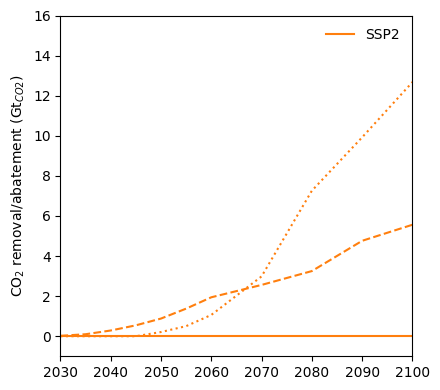

In [3]:
colors = {"SSP1":"tab:red","SSP2":"tab:orange","SSP3":"tab:green","SSP4":"tab:blue","SSP5":"tab:purple",}
lines = ["-","--","-.",":",(0, (3, 1, 1, 1, 1, 1))]

dactec = ['dac_lt','dac_ht']


mp = ixmp.Platform()

plt.figure(figsize=(4.5,4))

dacrem = {f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1": 
         {f"1000f_all-ssp-param_no-dac": []} 
         for ssp in ssps}
          
ccsrem = {f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1": 
         {f"1000f_all-ssp-param_no-dac": []} 
         for ssp in ssps}

beccsrem = {f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1": 
         {f"1000f_all-ssp-param_no-dac": []} 
         for ssp in ssps}

pipes = ["co2_trans1","co2_trans2","co2_trans3","co2_trans4","co2_trans5","co2_trans6"]

for k,v in dacrem.items():
    for k1,v1 in v.items():
        scen = message_ix.Scenario(mp, model=k, scenario=k1)
        dacremoval = (scen.var("ACT",{"technology":pipes,"mode":"M3"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        dacremoval = dacremoval.groupby("year_act").sum()["lvl"]
        dacrem[k][k1] = dacremoval
        
        ccsremoval = (scen.var("ACT",{"technology":pipes,"mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        ccsremoval = ccsremoval.groupby("year_act").sum()["lvl"]
        ccsrem[k][k1] = ccsremoval
        
        beccsremoval = (scen.var("ACT",{"technology":pipes,"mode":"M2"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        beccsremoval = beccsremoval.groupby("year_act").sum()["lvl"]
        beccsrem[k][k1] = beccsremoval


techs_lines = {"DAC":"-","FICCS":"--","BECCS":":"}
for ssp in ssps:
    model = f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1"
    scenario = f"1000f_all-ssp-param_no-dac"
    for tech in techs_lines.keys():
        if tech == "DAC":
            val = dacrem[model][scenario]
        elif tech == "FICCS":
            val = ccsrem[model][scenario]
        else:
            val = beccsrem[model][scenario]
        
        if ssp == "SSP1":
            kwargs = {"label": f"{ssp}-{tech}","ls":techs_lines[tech]}
        elif ssp != "SSP1" and tech == 'DAC':
            kwargs = {"label": f"{ssp}","ls":techs_lines[tech]}
        else:
            kwargs = {"ls":techs_lines[tech]}

        plt.plot(val, c=colors[ssp], **kwargs)
    

plt.xlim(2030,2100)
plt.xticks(range(2030,2110,10))
plt.ylim(-1,16)
plt.yticks(range(0,18,2))
plt.ylabel("CO$_2$ removal/abatement (Gt$_{CO2}$)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("All SSPs without DAC.jpeg",dpi=300)
plt.show()

mp.close_db()

# All SSP with DAC

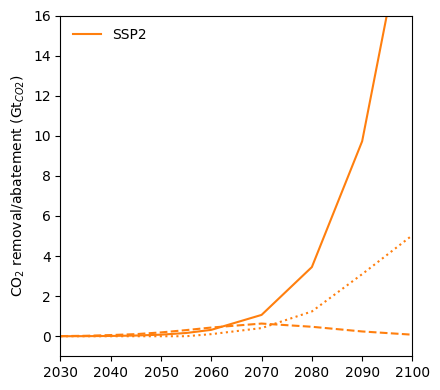

In [4]:
colors = {"SSP1":"tab:red","SSP2":"tab:orange","SSP3":"tab:green","SSP4":"tab:blue","SSP5":"tab:purple",}
lines = ["-","--","-.",":",(0, (3, 1, 1, 1, 1, 1))]

dactec = ['dac_lt','dac_ht']


mp = ixmp.Platform()

plt.figure(figsize=(4.5,4))

dacrem = {f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1": 
         {f"1000f_all-ssp-param": []} 
         for ssp in ssps}
          
ccsrem = {f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1": 
         {f"1000f_all-ssp-param": []} 
         for ssp in ssps}

beccsrem = {f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1": 
         {f"1000f_all-ssp-param": []} 
         for ssp in ssps}

pipes = ["co2_trans1","co2_trans2","co2_trans3","co2_trans4","co2_trans5","co2_trans6"]

for k,v in dacrem.items():
    for k1,v1 in v.items():
        scen = message_ix.Scenario(mp, model=k, scenario=k1)
        dacremoval = (scen.var("ACT",{"technology":pipes,"mode":"M3"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        dacremoval = dacremoval.groupby("year_act").sum()["lvl"]
        dacrem[k][k1] = dacremoval
        
        ccsremoval = (scen.var("ACT",{"technology":pipes,"mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        ccsremoval = ccsremoval.groupby("year_act").sum()["lvl"]
        ccsrem[k][k1] = ccsremoval
        
        beccsremoval = (scen.var("ACT",{"technology":pipes,"mode":"M2"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        beccsremoval = beccsremoval.groupby("year_act").sum()["lvl"]
        beccsrem[k][k1] = beccsremoval


techs_lines = {"DAC":"-","FICCS":"--","BECCS":":"}
for ssp in ssps:
    model = f"SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1"
    scenario = f"1000f_all-ssp-param"
    for tech in techs_lines.keys():
        if tech == "DAC":
            val = dacrem[model][scenario]
        elif tech == "FICCS":
            val = ccsrem[model][scenario]
        else:
            val = beccsrem[model][scenario]
        
        if ssp == "SSP1":
            kwargs = {"label": f"{ssp}-{tech}","ls":techs_lines[tech]}
        elif ssp != "SSP1" and tech == 'DAC':
            kwargs = {"label": f"{ssp}","ls":techs_lines[tech]}
        else:
            kwargs = {"ls":techs_lines[tech]}

        plt.plot(val, c=colors[ssp], **kwargs)
    

plt.xlim(2030,2100)
plt.xticks(range(2030,2110,10))
plt.ylim(-1,16)
plt.yticks(range(0,18,2))
plt.ylabel("CO$_2$ removal/abatement (Gt$_{CO2}$)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("All SSPs with DAC.jpeg",dpi=300)
plt.show()

mp.close_db()

# Emissions

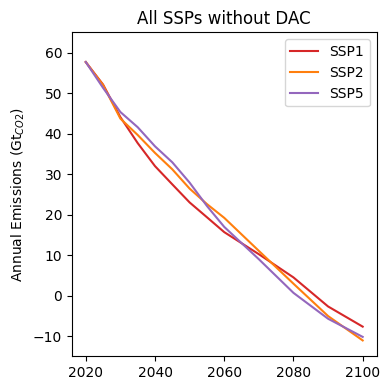

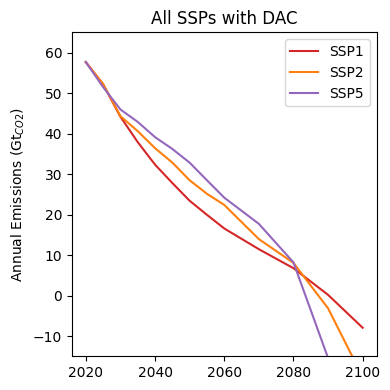

In [5]:
setups = {#'Base without DAC':'1000f_no-dac',
          'All SSPs without DAC':'1000f_all-ssp-param_no-dac',
          'All SSPs with DAC':'1000f_all-ssp-param'}

colors = {"SSP1":"tab:red","SSP2":"tab:orange","SSP3":"tab:green","SSP4":"tab:blue","SSP5":"tab:purple",}


mp = ixmp.Platform()
for key,val in setups.items():
    fig, ax = plt.subplots(figsize=(4,4))
    ssp1 = message_ix.Scenario(mp, model=f'SSP_dev_SSP1_v0.1_materials-dac-co2split-v1', 
                               scenario=val)
    ssp2 = message_ix.Scenario(mp, model=f'SSP_dev_SSP2_v0.1_materials-dac-co2split-v1', 
                               scenario=val)
    ssp5 = message_ix.Scenario(mp, model=f'SSP_dev_SSP5_v0.1_materials-dac-co2split-v1', 
                               scenario=val)
    
    years = [year for year in ssp1.set("year") if year >= 2025]
    
    year = list(ssp1.var("EMISS",{"node":"World","emission":"TCE","type_tec":"all"})["year"])[0:len(years)]
    e_ssp1 = list(ssp1.var("EMISS",{"node":"World","emission":"TCE","type_tec":"all"})["lvl"])[0:len(years)]
    e_ssp2 = list(ssp2.var("EMISS",{"node":"World","emission":"TCE","type_tec":"all"})["lvl"])[0:len(years)]
    e_ssp5 = list(ssp5.var("EMISS",{"node":"World","emission":"TCE","type_tec":"all"})["lvl"])[0:len(years)]

    ax.plot(year, [3.667*x/1000 for x in e_ssp1], 
             ls = '-', c = "tab:red", label = "SSP1", zorder=0)
    ax.plot(year, [3.667*x/1000 for x in e_ssp2], 
             ls = '-', c = "tab:orange", label = "SSP2", zorder=0)
    ax.plot(year, [3.667*x/1000 for x in e_ssp5], 
             ls = '-', c = "tab:purple", label = "SSP5", zorder=0)
    
    ax.set_title(key)
    ax.set_ylabel('Annual Emissions (Gt$_{CO2}$)')
    ax.set_ylim(-15,65)
    ax.legend()

    plt.tight_layout()
    fig.savefig(f'{key} Emissions.jpg', dpi=300)
    plt.show()
    
# CLOSE CONNECTION
mp.close_db()


# Annual CO2 injection

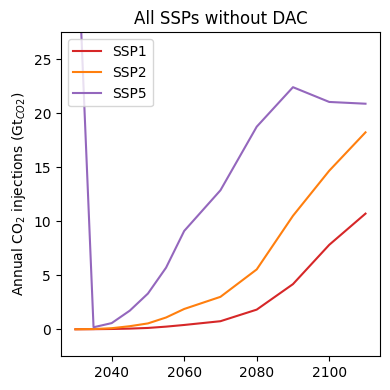

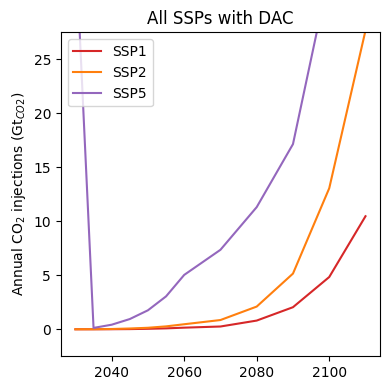

In [6]:
setups = {#'Base without DAC':'1000f_no-dac',
          'All SSPs without DAC':'1000f_all-ssp-param_no-dac',
          'All SSPs with DAC':'1000f_all-ssp-param'}

colors = {"SSP1":"tab:red","SSP2":"tab:orange","SSP3":"tab:green","SSP4":"tab:blue","SSP5":"tab:purple",}


mp = ixmp.Platform()
for key,val in setups.items():
    fig, ax = plt.subplots(figsize=(4,4))
    ssp1 = message_ix.Scenario(mp, model=f'SSP_dev_SSP1_v0.1_materials-dac-co2split-v1', 
                               scenario=val)
    ssp2 = message_ix.Scenario(mp, model=f'SSP_dev_SSP2_v0.1_materials-dac-co2split-v1', 
                               scenario=val)
    ssp5 = message_ix.Scenario(mp, model=f'SSP_dev_SSP5_v0.1_materials-dac-co2split-v1', 
                               scenario=val)
    
    years = [year for year in ssp1.set("year") if year > 2025]
    year = years[0:len(years)]
    
    rem_ssp1 = (ssp1.var("ACT",{"technology":"co2_stor"})
              .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
              .droplevel(["mode","time"])).mul(3.667).div(1000)
    rem_ssp1 = list(rem_ssp1.groupby("year_act").sum()["lvl"])[0:len(years)]
    
    rem_ssp2 = (ssp2.var("ACT",{"technology":"co2_stor"})
              .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
              .droplevel(["mode","time"])).mul(3.667).div(1000)
    rem_ssp2 = list(rem_ssp2.groupby("year_act").sum()["lvl"])[0:len(years)]
    
    rem_ssp5 = (ssp5.var("ACT",{"technology":"co2_stor"})
              .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
              .droplevel(["mode","time"])).mul(3.667).div(1000)
    rem_ssp5 = list(rem_ssp5.groupby("year_act").sum()["lvl"])[0:len(years)]
    
    
    ax.plot(year, rem_ssp1, 
             ls = '-', c = "tab:red", label = "SSP1", zorder=0)
    ax.plot(year, rem_ssp2, 
             ls = '-', c = "tab:orange", label = "SSP2", zorder=0)
    ax.plot(year, rem_ssp5, 
             ls = '-', c = "tab:purple", label = "SSP5", zorder=0)
    
    ax.set_title(key)
    ax.set_ylabel('Annual CO$_2$ injections (Gt$_{CO2}$)')
    ax.set_ylim(-2.5,27.5)
    ax.legend(loc='upper left')

    plt.tight_layout()
    fig.savefig(f'{key} CO2 injection.jpg', dpi=300)
    plt.show()
    
# CLOSE CONNECTION
mp.close_db()


# IAMC Reporting

In [2]:
import ixmp
import message_ix

#from message_data.model.material.report.reporting import report
from message_data.tools.post_processing.iamc_report_hackathon import (
    report as reporting)

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP1","SSP2","SSP5"]
ssps = ["SSP2"]

setups = {#'Base without DAC':'1000f_no-dac',
          'CCUS SSP without DAC':'1000f_all-ssp-param_no-dac',
          'CCUS SSP with DAC':'1000f_all-ssp-param'}

for ssp in ssps:
    for key,val in setups.items():
        print(ssp,'--',key)
        mp = ixmp.Platform()
        mo_name = f'SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1'
        sc_name = val
        scen = message_ix.Scenario(mp, model=mo_name, scenario=sc_name)
        
        # report(scenario)
        print("Reporting standard variables")
        reporting(
            mp,
            scen,
            # NB(PNK) this is not an error; .iamc_report_hackathon.report() expects a
            #         string containing "True" or "False" instead of an actual bool.
            "False",
            scen.model,
            scen.scenario,
            merge_hist=True,
            merge_ts=True,
            run_config="SSP_dev_run_config.yaml",
        )
        mp.close_db()

SSP2 -- CCUS SSP without DAC
Reporting standard variables
processing Table: Primary Energy
processing Table: Final Energy
no emissions included
no emissions included
Starting to upload timeseries
    region                                          variable   unit  \
0  R12_AFR                                    Primary Energy  EJ/yr   
1  R12_AFR                            Primary Energy|Biomass  EJ/yr   
2  R12_AFR             Primary Energy|Biomass|1st Generation  EJ/yr   
3  R12_AFR   Primary Energy|Biomass|1st Generation|Biodiesel  EJ/yr   
4  R12_AFR  Primary Energy|Biomass|1st Generation|Bioethanol  EJ/yr   

        2020       2025       2030       2035       2040       2045  \
0  18.005013  19.723053  21.628215  25.631837  28.130476  33.277499   
1   6.627539   8.230392   9.108783   9.856121  10.090963  10.492952   
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4   0.000000   0.00000

**Plotting in Pyam**

**Temporary for CCS supply curve test**

-- SSP2 --


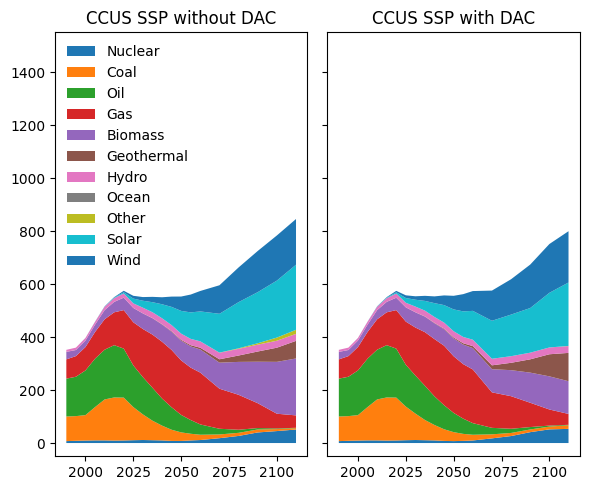

In [4]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP2"]

setups = {#'Base without DAC':'1000f_no-dac',
          'CCUS SSP without DAC':'1000f_all-ssp-param_no-dac',
          'CCUS SSP with DAC':'1000f_all-ssp-param'}

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Primary Energy|Nuclear',
            'Primary Energy|Coal',
            'Primary Energy|Oil',
            'Primary Energy|Gas',
            'Primary Energy|Biomass',
            'Primary Energy|Geothermal',
            'Primary Energy|Hydro',
            'Primary Energy|Ocean',
            'Primary Energy|Other',
            'Primary Energy|Solar',
            'Primary Energy|Wind']

for ssp in ssps:
    print('--',ssp,'--')
    fig, axs = plt.subplots(ncols=2, figsize=(6,5), sharex=True, sharey=True)
    count = 0
    for key,val in setups.items():
        if key == 'Base without DAC':
            fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split_'+f'{val}.xlsx'
        else:
            fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1_'+f'{val}.xlsx'
        df = pd.read_excel(path+fname)
        df.fillna('Empty Data')
        df = pyam.IamDataFrame(data=df)
        data = df.filter(region='World', variable=var_plot)
        
        data_plot = {var: list(data.filter(variable=var).timeseries().iloc[0]) 
                     for var in var_plot}
        
        years = list(data.timeseries().columns)

        axs[count].stackplot(years,data_plot.values(),
                      labels=[label.replace('Primary Energy|', '') 
                              for label in list(data_plot.keys())]
                     )
        axs[count].set_title(key)
        count += 1
        
    axs[0].set_ylim(-50,1550)
    axs[0].legend(ncol=1, frameon=False, loc='upper left')
    
    plt.tight_layout()
    fig.savefig(f'Primary Energy {ssp} temp.jpeg', dpi=300)
    plt.show()

        

-- SSP2 --


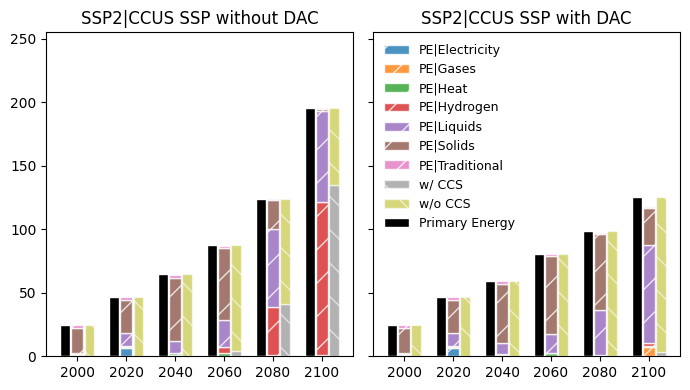

In [8]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP2"]

setups = {#'Base without DAC':'1000f_no-dac',
          'CCUS SSP without DAC':'1000f_all-ssp-param_no-dac',
          'CCUS SSP with DAC':'1000f_all-ssp-param'}

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

tot_plot = [
    'Primary Energy|Biomass',]


fe_plot = [
    'Final Energy|Industry|Liquids|Biomass',
    'Final Energy|Industry|Solids|Biomass',
    'Final Energy|Non-Energy Use|Biomass',
    'Final Energy|Non-Energy Use|Liquids|Biomass',
    'Final Energy|Residential and Commercial|Liquids|Biomass',
    'Final Energy|Residential and Commercial|Solids|Biomass',
    'Final Energy|Transportation|Liquids|Biomass',

]

pe_plot = [
    'Primary Energy|Biomass|Electricity',
    'Primary Energy|Biomass|Gases',
    'Primary Energy|Biomass|Heat',
    'Primary Energy|Biomass|Hydrogen',
    'Primary Energy|Biomass|Liquids',
    #'Primary Energy|Biomass|Ammonia',
    #'Primary Energy|Biomass|Residues',
    'Primary Energy|Biomass|Solids',
    'Primary Energy|Biomass|Traditional',
]

ccs_plot = [
    'Primary Energy|Biomass|w/ CCS',
    'Primary Energy|Biomass|w/o CCS',
]


years = [*range(2000,2110,20)]

for ssp in ssps:
#for ssp in ['SSP1']:
    print('--',ssp,'--')
    fig, axs = plt.subplots(ncols=2, figsize=(7,4), sharex=True, sharey=True)
    count = 0
    for key,val in setups.items():
        if key == 'Base without DAC':
            fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split_'+f'{val}.xlsx'
        else:
            fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split-v1_'+f'{val}.xlsx'
        #'''
        df = pd.read_excel(path+fname)
        df.fillna('Empty Data')
        df = pyam.IamDataFrame(data=df)
        
        tot_data = df.filter(region='World', year=years, variable=tot_plot).timeseries().fillna(0)
        tot_data = pyam.IamDataFrame(data=tot_data)
        
        
        pe_data = df.filter(region='World', year=years, variable=pe_plot).timeseries().fillna(0)
        pe_data = pyam.IamDataFrame(data=pe_data)
        
        ccs_data = df.filter(region='World', year=years, variable=ccs_plot).timeseries().fillna(0)
        ccs_data = pyam.IamDataFrame(data=ccs_data)
        
        
        tot_data_plot = list(tot_data.timeseries().iloc[0])
                
        pe_data_plot = {var: list(pe_data.filter(variable=var).timeseries().iloc[0]) 
                     for var in pe_plot}
        
        ccs_data_plot = {var: list(ccs_data.filter(variable=var).timeseries().iloc[0]) 
                     for var in ccs_plot}
        #'''
        
        bottom = np.zeros(len(years))
        for k, v in pe_data_plot.items():
            axs[count].bar([year for year in years],v,bottom=bottom, width=5, 
                           hatch='/', edgecolor= 'white', alpha=0.8,
                           label=k.replace('|Biomass', '').replace('Primary Energy', 'PE')
                         )
            bottom += v

        bottom = np.zeros(len(years))
        for k, v in ccs_data_plot.items():
            axs[count].bar([year + 5 for year in years],v,bottom=bottom, width=4, 
                           hatch='\\', edgecolor= 'white', alpha=0.6,
                           label=k.replace('|Biomass', '').replace('Primary Energy|', '')
                         )
            bottom += v
        
        axs[count].bar([year - 5 for year in years],tot_data_plot, width=4, 
                       edgecolor= 'white', color='black',label='Primary Energy')
        
        axs[count].set_title(ssp+'|'+key)
        count += 1
        
    axs[0].set_ylim(0,255)
    axs[1].legend(ncol=1, frameon=False,loc='upper left', fontsize=9)
    
    plt.tight_layout()
    fig.savefig(f'Final Energy {ssp} biomass temp.jpeg', dpi=300)
    plt.show()

        

# Biomass check

# Flow check